In [1]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
astronn = at.Table.read('/Users/apricewhelan/data/APOGEE_DR16/apogee_astroNN-DR16.fits')
astronn.rename_column('apogee_id', 'APOGEE_ID')
allstar = at.Table.read('/Users/apricewhelan/data/APOGEE_DR16/allStarLite-r12-l33.fits')

In [8]:
joined = at.join(allstar, astronn, keys='APOGEE_ID', 
                 uniq_col_name='{col_name}{table_name}', 
                 table_names=['', '_2'])
joined = joined[np.unique(joined['APOGEE_ID'], return_index=True)[1]]

In [9]:
rgb_mask = ((joined['LOGG'] > 0.5) &
            (joined['LOGG'] < 3.))
plx_snr_mask = ((joined['GAIA_PARALLAX'] / joined['GAIA_PARALLAX_ERROR']) > 6)

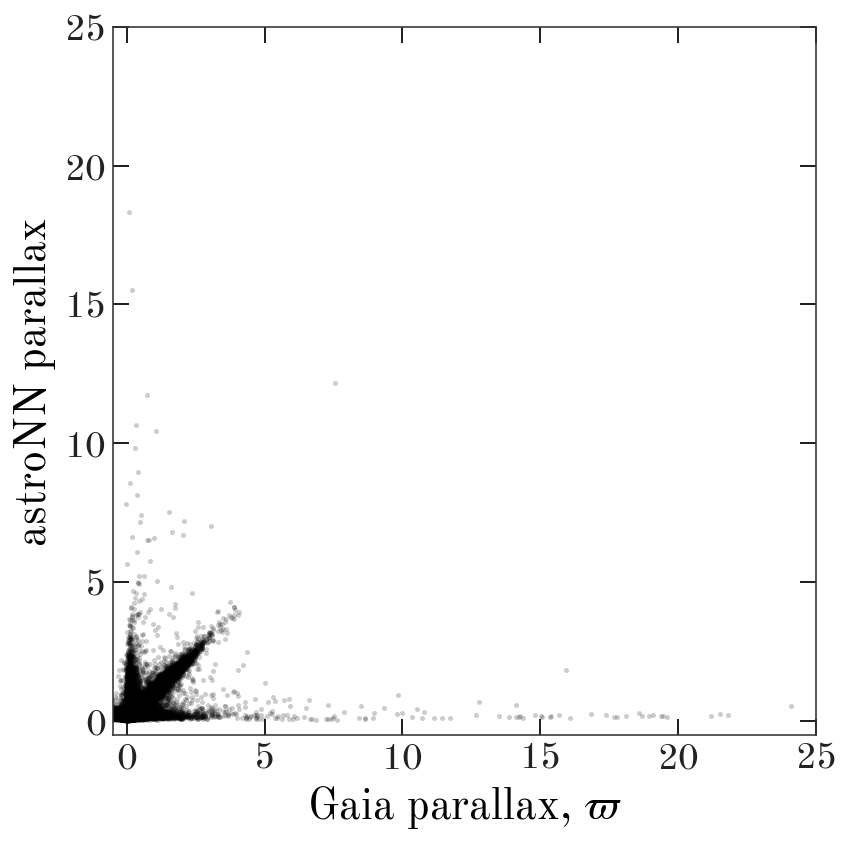

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(joined['GAIA_PARALLAX'][rgb_mask],
        joined['nn_parallax'][rgb_mask],
        marker='o', ls='none', alpha=0.2, 
        mew=0, ms=2.5)
ax.set_xlim(-0.5, 25)
ax.set_ylim(-0.5, 25)

ax.set_xlabel(r'Gaia parallax, $\varpi$')
ax.set_ylabel('astroNN parallax')

fig.set_facecolor('w')
fig.tight_layout()

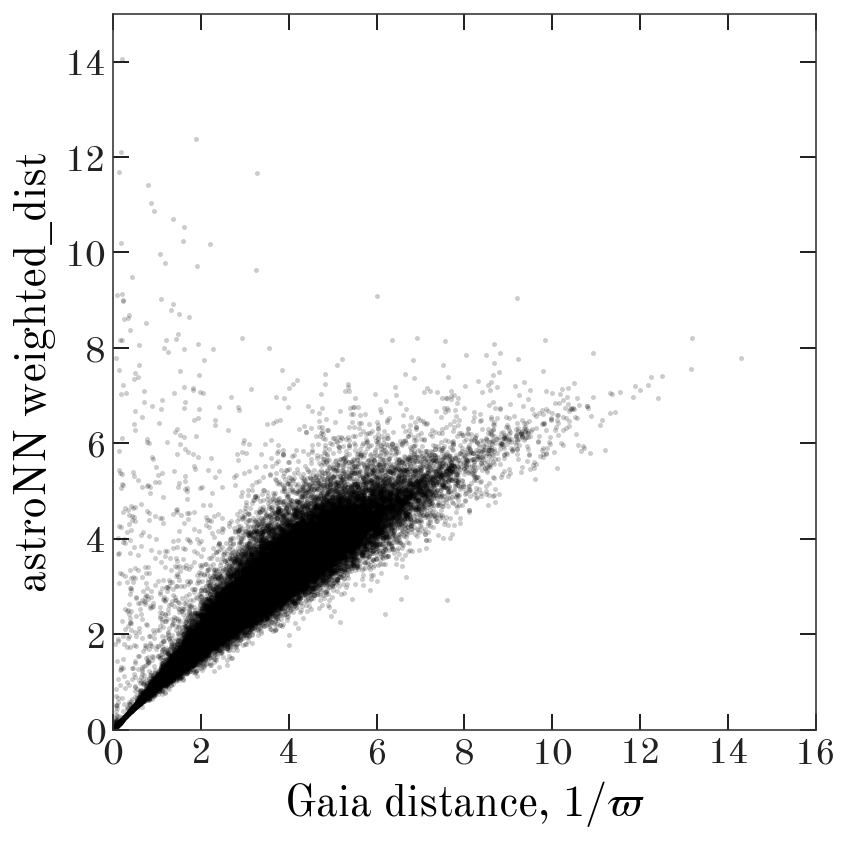

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(1 / joined['GAIA_PARALLAX'][rgb_mask & plx_snr_mask],
        joined['weighted_dist'][rgb_mask & plx_snr_mask] / 1e3,
        marker='o', ls='none', alpha=0.2, 
        mew=0, ms=2.5)
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)

ax.set_xticks(ax.get_yticks())

ax.set_xlabel(r'Gaia distance, $1/\varpi$')
ax.set_ylabel('astroNN weighted_dist')

fig.set_facecolor('w')
fig.tight_layout()

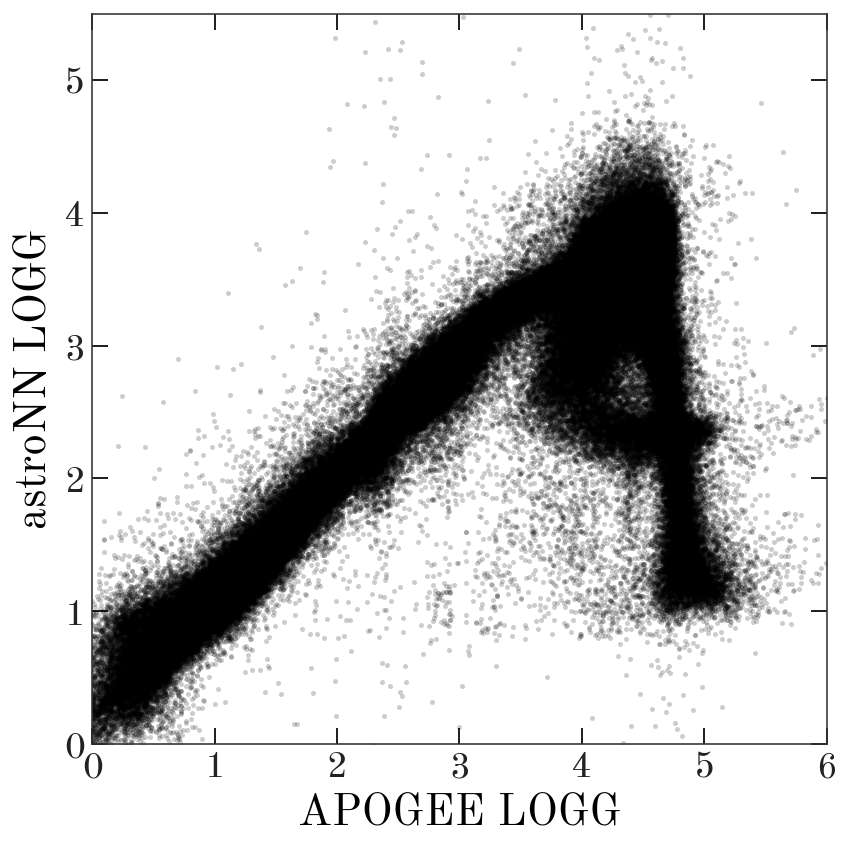

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(joined['LOGG'], joined['LOGG_2'],
        marker='o', ls='none', alpha=0.2, 
        mew=0, ms=2.5)
ax.set_xlim(0, 5.5)
ax.set_ylim(0, 5.5)

ax.set_xticks(ax.get_yticks())

ax.set_xlabel(r'APOGEE LOGG')
ax.set_ylabel('astroNN LOGG')

fig.set_facecolor('w')
fig.tight_layout()